# Yelp - Daikokuya Little Tokyo  comment and rating analysis

Import packages. You will use numpy, nltk, csv, matplotlib and SentimentIntensityAnalyzer (from nltk.sentiment.vader) in HW2.

In [25]:
import matplotlib
import numpy
import csv
from nltk.sentiment.vader import SentimentIntensityAnalyzer

This function can be used to draw a box plot. 

rating_list: a list of numeric ratings given in the csv file

sentiment_list: a list of sentimeny analysis results obtained by NLTK

In [26]:
%matplotlib inline
def draw_box_plot(rating_list, sentiment_list):
    rset = sorted(set(rating_list))
    sentall = []
    for r in rset:
        sentlist = []
        for i, rval in enumerate(rating_list):
            if (rval == r):
                sentlist.append(sentiment_list[i])
        sentall.append(sentlist)

    matplotlib.pyplot.figure()
    matplotlib.pyplot.boxplot(sentall, labels=rset)
    matplotlib.pyplot.xlabel('Ratings')
    matplotlib.pyplot.ylabel('Sentiment')


Read csv file by using the csv.reader function.

In [27]:
csvfile = open('yelp.csv')
yelp=csv.reader(csvfile)


Calculate compound scores using the polarity_scores method. 

In [20]:
scores= []
for row in (yelp):
    sid= SentimentIntensityAnalyzer()
    scores.append(sid.polarity_scores(row[0]))
compound = []
for i in scores:
    compound.append(i['compound']) 
print(compound)

[0.9915, 0.9926, 0.9766, 0.9794, 0.9735, 0.9886, 0.9984, 0.8553, 0.9978, 0.9979, 0.9766, 0.961, 0.9695, 0.9953, 0.9877, 0.9968, 0.9612, 0.9749, 0.9381, 0.9892, 0.9959, 0.9947, 0.7479, 0.881, 0.9912, -0.3865, -0.1531, 0.9521, 0.9595, 0.9099, 0.9668, 0.9926, 0.9899, 0.9907, -0.6521, 0.9935, -0.6475, 0.9851, 0.7522, 0.9866, 0.9732, 0.9771, 0.9391, 0.9556, 0.7915, 0.9412, 0.2421, 0.9924, 0.6858, 0.741, 0.9708, -0.3044, 0.9767, 0.989, 0.9399, 0.9867, 0.9962, 0.8702, 0.787, 0.9821, 0.9935, 0.6872, 0.9346, 0.9913, 0.8812, 0.7951, 0.9495, 0.2481, 0.2598, 0.1956, 0.9702, 0.5854, 0.9744, 0.9756, 0.9792, 0.9825, 0.9609, 0.9767, 0.8812, 0.988, 0.9891, 0.9893, 0.9611, 0.9983, 0.9911, 0.9615, 0.9924, 0.9499, 0.9954, 0.91, -0.7226, 0.9392, -0.2856, 0.9621, 0.985, 0.806, 0.9915, 0.9867, 0.9471, 0.9963, 0.9807, 0.9431, 0.9877, 0.0653, 0.8624, 0.9871, -0.4608, 0.6966, 0.9667, -0.9225, 0.9769, 0.9211, 0.9494, 0.9191, 0.8718, 0.9833, 0.6322, 0.98, 0.8817, 0.5515, 0.6627, 0.9212, 0.9918, 0.3956, -0.5786, 0

Calculate the correlation between ratings and classified sentiments.

In [28]:
rating=[]
for row in yelp:
    rating.append(int((row[1])))
numpy.corrcoef(compound,rating)

array([[1.        , 0.44146938],
       [0.44146938, 1.        ]])

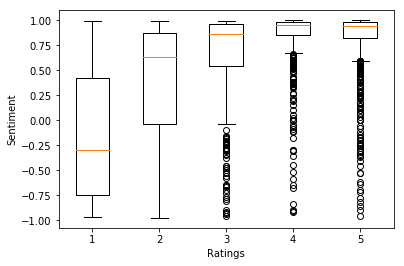

In [29]:
draw_box_plot(rating, compound)